In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier



In [2]:


with open("mei.csv", 'r', encoding="utf-8") as read_: #read다음에_는 의미가 없다. read랑 헷갈리지말라고 쓴 것. a 라고 해도 무방.
    text=read_.readlines()

rows=[]
for i in text[1:]:
    rows.append(list(map(int,i.split(",")[:-1]))) # 이름으로 끝나기 때문에 , 가 없다 그래서 -1로 슬라이싱 해준다.
print(i)

df=pd.DataFrame(rows)
df.columns=["sensor%d"%i for i in range(1,17)]

with open("jo.csv", 'r', encoding="utf-8") as read_:
    text2=read_.readlines()
    

rows2=[]
for i in text2[1:]:
    rows2.append(list(map(int,i.split(",")[:-1])))
print(i)

with open("joo.csv", 'r', encoding="utf-8") as read_:
    text3=read_.readlines()
    
rows9=[]
for i in text3[1:]:
    rows9.append(list(map(int,i.split(",")[:-1])))
print(i)

df2=pd.DataFrame(rows2)
df2.columns=["sensor%d"%i for i in range(1,17)]


df3=pd.DataFrame(rows9)
df3.columns=["sensor%d"%i for i in range(1,17)]



52,54,58,62,63,66,68,70,68,70,70,73,74,75,77,78,Mei
65,68,66,68,71,74,74,76,72,74,74,75,76,77,80,80,조진호
51,55,58,60,66,67,67,69,68,70,74,73,78,76,78,80,최주원


<AxesSubplot:>

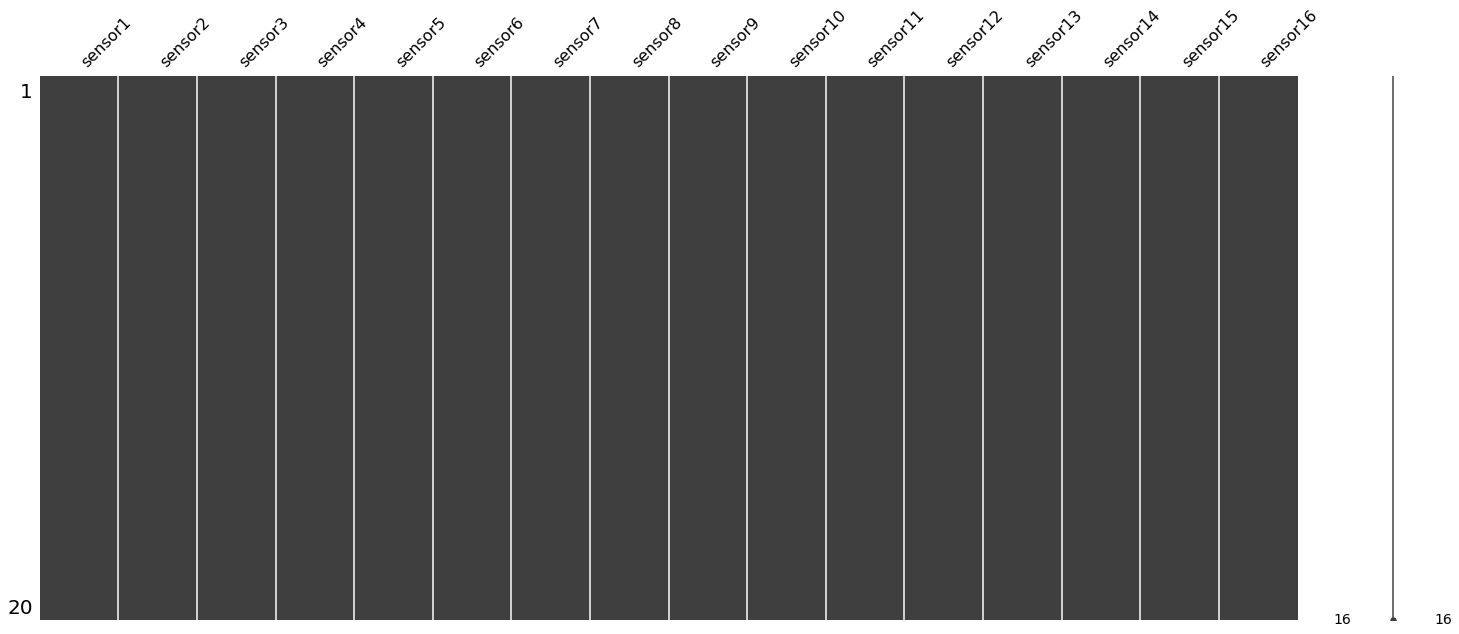

In [3]:
import missingno as msno

msno.matrix(df)

# msno.matrix(df) 을 통해 결측치가 없음을 확인하였다.



In [4]:

rows=[]

with open("jojin2.csv", 'r',encoding= "utf-8") as read_: 
    #read다음에_는 의미가 없다. read랑 헷갈리지말라고 쓴 것. a 라고 해도 무방.
    # 파일이 뭐가 다른 점이기에 오류가 뜰까...????
    text=read_.readlines()
for i in text[1:]:
    rows.append(list(map(int,i.split(",")[:-1])))#1
    # 뭐가 다른 점이기에 오류가 뜰까...????
print(i)



df= pd.DataFrame(rows)

msno.matrix(df)



df.columns=["sensor%d"%i for i in range(1,17)]

# dataset = pd.read_csv('choi1.csv', header= 0,
#                         encoding= 'unicode_escape')

with open("choi1.csv", 'r',header= 0,encoding= 'unicode_escape') as read_:
    text2=read_.readlines()#2
    

rows2=[]
for i in text2[1:]:
    rows2.append(list(map(int,i.split(",")[:-1])))
print(i)

with open("mei.csv", 'r',header= 0,
                        encoding= 'unicode_escape') as read_:
    text3=read_.readlines()
    
rows9=[]
for i in text3[1:]:
    rows9.append(list(map(int,i.split(",")[:-1])))
print(i)

df2=pd.DataFrame(rows2)
df2.columns=["sensor%d"%i for i in range(1,17)]


df3=pd.DataFrame(rows9)
df3.columns=["sensor%d"%i for i in range(1,17)]

ValueError: invalid literal for int() with base 10: '"92'

# 해야 할 일


- csv 파일 만들기
- --> 자동으로 data 에 concat 하기
- 그것을 train, test split(주로 train 에 배치)
- test 는 새로 들어온 데이터를 기준으로 함(신원인증 버튼 누르면 1분동안의 새 데이터)
- 레이블링(y_train 의 차원을 x_train 과 맞춰주기 위해서 코딩 필요)
- 자동 레이블링 과정 필요(string(id)-->int)


                            

In [5]:
data = pd.concat((df, df2, df3), axis=0)

In [6]:
data

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,91,93,85,90,95,93,86,91,87,87,87,86,88,87,90,87
1,70,73,69,71,76,76,77,78,74,75,76,78,79,80,78,81
2,65,64,68,67,72,71,74,73,73,70,72,74,77,77,78,78
3,13,19,24,29,35,37,41,47,44,48,51,55,58,59,59,62
4,102,100,102,97,99,99,97,96,92,91,89,89,91,91,90,88
5,76,78,76,77,79,80,81,81,79,81,80,81,81,83,82,80
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117
8,36,40,44,47,50,53,58,57,57,59,61,63,67,69,71,69
9,50,56,55,57,62,64,64,67,64,67,68,65,71,75,73,75


# data 를 16*16(행*열) 로 이미지 하나씩 해서 학습시키기???

- (--> 자동화??? 어떻게 할 것인지 파이썬 코드 필요)


# 나머지 4*16은 x_test

# 라벨은 마지막 열 이용!


In [7]:
data = data.assign(name = ['1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3'])


In [8]:
data['name']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
Name: name, dtype: object

In [9]:
data = np.array(data)

data = data.reshape(-1,)
data = data[:1071]
data = data.reshape(60,17)

In [10]:
data

array([[91, 93, 85, ..., 90, 87, '1'],
       [70, 73, 69, ..., 78, 81, '1'],
       [65, 64, 68, ..., 78, 78, '1'],
       ...,
       [66, 66, 68, ..., 83, 82, '3'],
       [65, 66, 68, ..., 81, 82, '3'],
       [51, 55, 58, ..., 78, 80, '3']], dtype=object)

In [11]:
data[:3]

array([[91, 93, 85, 90, 95, 93, 86, 91, 87, 87, 87, 86, 88, 87, 90, 87,
        '1'],
       [70, 73, 69, 71, 76, 76, 77, 78, 74, 75, 76, 78, 79, 80, 78, 81,
        '1'],
       [65, 64, 68, 67, 72, 71, 74, 73, 73, 70, 72, 74, 77, 77, 78, 78,
        '1']], dtype=object)

# 레이블이 3번 반복됨 

In [12]:
data

array([[91, 93, 85, ..., 90, 87, '1'],
       [70, 73, 69, ..., 78, 81, '1'],
       [65, 64, 68, ..., 78, 78, '1'],
       ...,
       [66, 66, 68, ..., 83, 82, '3'],
       [65, 66, 68, ..., 81, 82, '3'],
       [51, 55, 58, ..., 78, 80, '3']], dtype=object)

In [13]:
# data = data.assign(name = ['1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','2','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3'])

In [14]:
data = pd.DataFrame(data)

In [15]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,91,93,85,90,95,93,86,91,87,87,87,86,88,87,90,87,1
1,70,73,69,71,76,76,77,78,74,75,76,78,79,80,78,81,1
2,65,64,68,67,72,71,74,73,73,70,72,74,77,77,78,78,1
3,13,19,24,29,35,37,41,47,44,48,51,55,58,59,59,62,1
4,102,100,102,97,99,99,97,96,92,91,89,89,91,91,90,88,1
5,76,78,76,77,79,80,81,81,79,81,80,81,81,83,82,80,1
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80,1
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117,1
8,36,40,44,47,50,53,58,57,57,59,61,63,67,69,71,69,1
9,50,56,55,57,62,64,64,67,64,67,68,65,71,75,73,75,1


# 행, 열 (마지막 열 자름)

In [16]:
print(data.iloc[0:60, :-1]) # 행, 열 (마지막 열 자름)

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0    91   93   85   90   95   93   86   91   87   87   87   86   88   87   90   
1    70   73   69   71   76   76   77   78   74   75   76   78   79   80   78   
2    65   64   68   67   72   71   74   73   73   70   72   74   77   77   78   
3    13   19   24   29   35   37   41   47   44   48   51   55   58   59   59   
4   102  100  102   97   99   99   97   96   92   91   89   89   91   91   90   
5    76   78   76   77   79   80   81   81   79   81   80   81   81   83   82   
6    70   71   72   72   76   76   77   77   74   74   71   76   81   79   80   
7   167  163  157  151  149  145  139  136  130  127  122  120  120  120  115   
8    36   40   44   47   50   53   58   57   57   59   61   63   67   69   71   
9    50   56   55   57   62   64   64   67   64   67   68   65   71   75   73   
10   50   52   52   56   62   64   65   66   65   66   69   68   73   73   73   
11   43   49   50   54   57 

In [17]:
x_data = data.iloc[0:60, :-1] # 행, 열 (마지막 열 자름)

In [18]:
x_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,91,93,85,90,95,93,86,91,87,87,87,86,88,87,90,87
1,70,73,69,71,76,76,77,78,74,75,76,78,79,80,78,81
2,65,64,68,67,72,71,74,73,73,70,72,74,77,77,78,78
3,13,19,24,29,35,37,41,47,44,48,51,55,58,59,59,62
4,102,100,102,97,99,99,97,96,92,91,89,89,91,91,90,88
5,76,78,76,77,79,80,81,81,79,81,80,81,81,83,82,80
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117
8,36,40,44,47,50,53,58,57,57,59,61,63,67,69,71,69
9,50,56,55,57,62,64,64,67,64,67,68,65,71,75,73,75


In [19]:
x_data.unsqueeze(1)

AttributeError: 'DataFrame' object has no attribute 'unsqueeze'

In [20]:
x_data.squeeze(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,91,93,85,90,95,93,86,91,87,87,87,86,88,87,90,87
1,70,73,69,71,76,76,77,78,74,75,76,78,79,80,78,81
2,65,64,68,67,72,71,74,73,73,70,72,74,77,77,78,78
3,13,19,24,29,35,37,41,47,44,48,51,55,58,59,59,62
4,102,100,102,97,99,99,97,96,92,91,89,89,91,91,90,88
5,76,78,76,77,79,80,81,81,79,81,80,81,81,83,82,80
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117
8,36,40,44,47,50,53,58,57,57,59,61,63,67,69,71,69
9,50,56,55,57,62,64,64,67,64,67,68,65,71,75,73,75


In [21]:
x_data.shape()

TypeError: 'tuple' object is not callable

In [22]:
t1 = tf.fill([20, 16], 1)

In [23]:
t1 = pd.DataFrame(t1)

In [24]:
t1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
1,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
2,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
3,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
4,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
5,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
6,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int

In [25]:
t2 = tf.fill([20, 16], 2)

In [26]:
t2 = pd.DataFrame(t2)

In [27]:
t3 = tf.fill([20, 16], 3)

In [28]:
t3 = pd.DataFrame(t3)

In [29]:
datat = pd.concat((t1, t2, t3), axis=0)

In [30]:
datat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
1,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
2,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
3,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
4,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
5,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
6,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int

In [31]:
print(data.iloc[0:60, 16]) # 행, 16번째 열 

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
59    3
Name: 16, dtype: object


In [32]:
x_label = data.iloc[0:60, 16]

In [33]:
x_label = x_label.to_frame()


In [34]:
x_label

,16
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [35]:
print(x_label.shape)

(60, 1)


# x_data, x_label 로  데이터를 만들었음 

# 여러 열 추가 

In [36]:
x_data2 = x_data.reindex(columns = x_data.columns.tolist() + ["sensor%d"%i for i in range(1,17)])# 열들 추가해주는 것!!(+의 의미)

x_data2

,0,1,2,3,4,5,6,7,8,9,...,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,91,93,85,90,95,93,86,91,87,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,73,69,71,76,76,77,78,74,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65,64,68,67,72,71,74,73,73,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,19,24,29,35,37,41,47,44,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102,100,102,97,99,99,97,96,92,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,76,78,76,77,79,80,81,81,79,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,70,71,72,72,76,76,77,77,74,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,167,163,157,151,149,145,139,136,130,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,36,40,44,47,50,53,58,57,57,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,50,56,55,57,62,64,64,67,64,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
yt1 = ytname.reindex(columns = ytname.columns.tolist() + ["sensor%d"%i for i in range(1,17)])
yt1

NameError: name 'ytname' is not defined

In [38]:

yt = yt1.copy()
yt

NameError: name 'yt1' is not defined

In [39]:
yt

NameError: name 'yt' is not defined

In [40]:
yt1 = yt.sensor1.fillna(ytname.name[0])
yt2 = yt.sensor2.fillna(ytname.name[1])
yt3 = yt.sensor3.fillna(ytname.name[2])

yt1 = yt1.to_frame()
yt2 = yt2.to_frame()
yt3 = yt3.to_frame()

yt1 

NameError: name 'yt' is not defined

In [41]:

for i in range(19):
     pd.concat([yt{i},yt{i+1}],axis = 1])
               
print(rows)

SyntaxError: invalid syntax (1428377870.py, line 2)

# 위 코드 : 파이썬으로 자동화 시키고 싶음 ! 

In [42]:
yt2

NameError: name 'yt2' is not defined

In [43]:

ytend = pd.concat([yt1,yt2,yt3],axis =1, ignore_index=True)
ytend

NameError: name 'yt1' is not defined

# 이걸 리스트 단위로 concat 하지말고, 가로로 쭉 길게 잇는게 목표 ~! 
## axis = 1 으로 설정하면 그렇게 된다!

## axis = 0 일 경우 밑으로 이어짐


In [44]:
yt1
yt1 = yt1.to_frame()
yt1

NameError: name 'yt1' is not defined

In [45]:
yt1.dropna(inplace = True)

NameError: name 'yt1' is not defined

In [46]:
yt1

NameError: name 'yt1' is not defined

# 이 코드에 힘을 쏟고 있음


In [47]:
for i in range (19) :
    yt1[i][i] = yt1[i][0]

    

#        for i in range (19) :
#     yt1.assign(sensor1 = yt1.name[i])
    
            
# yt1.name[1,i] = yt1.sensor1[i]

NameError: name 'yt1' is not defined

In [48]:
yt1

NameError: name 'yt1' is not defined

# name 의 첫번째 열의 첫번째 행의 값으로
# 첫번째 행들의 값들로 다 채워지게 하기

# yt1.name[1,i] = yt1.sensor1.[i]





In [49]:
yt2 = yt1.assign(TEST= lambda x : x.name[i])
yt2

NameError: name 'yt1' is not defined

In [50]:
data.iloc[20:39, :-1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
20,96,94,92,92,93,93,95,92,90,89,89,88,89,92,91,90
21,92,92,92,91,93,94,91,95,87,88,86,86,88,90,87,88
22,112,110,107,106,107,104,102,102,99,96,96,95,88,94,97,93
23,93,91,90,91,93,92,91,91,87,87,88,89,87,87,87,88
24,93,93,90,91,92,93,93,91,87,87,87,87,90,88,89,88
25,92,93,92,90,94,92,91,92,87,88,84,86,87,87,85,88
26,91,91,88,91,89,92,89,89,85,86,85,87,87,86,85,86
27,89,89,89,88,90,91,88,87,86,85,84,83,86,87,87,85
28,89,87,86,86,87,90,87,89,82,86,83,84,84,79,84,85
29,91,90,90,90,94,90,88,89,87,85,85,86,86,87,85,89


In [131]:
c1 = data.iloc[0:48 , 16]

In [132]:
c1

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
Name: 16, dtype: object

In [133]:
c1.shape

(48,)

In [127]:
data.iloc[20:39, 16]

20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
Name: 16, dtype: object

## 내 데이터에서 어떻게 슬라이싱해서 x_train, y_train 에 넣을 것인가???
## 라벨은 사람 이름...
## 기존 데이터 셋을 다 합쳐서 데이터셋을 만들고,
## 레이블링 할 것 !!! --> 레이블(0,1,2 ...)  비교 

In [52]:
# x_label, x_data 구현 완료


In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#예제

#
#(raw_train, raw_validation, raw_test), metadata = tfds.load(
 #   'cats_vs_dogs',
 #   split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
 #   with_info=True,
 #   as_supervised=True,
# #)
# x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size = 0.4,random_state=42) 
#1). X_train - 여기에는 모든 독립 변수가 포함되며 우리가 지정한 대로 모델을 훈련하는 데 사용되며, 완전한 데이터의 이 관찰 test_size = 0.4수단 60%은 모델을 훈련/적합하는 40%데 사용되고 나머지는 테스트에 사용됩니다. 모델.
#2). X_test40% - 학습 단계에서 사용되지 않고 모델의 정확도를 테스트하기 위한 예측을 수행하는 데 사용되는 데이터의 독립 변수의 나머지 부분입니다.
#3). y_train - 이것은 이 모델에 의해 예측되어야 하는 종속 변수입니다. 여기에는 독립 변수에 대한 범주 레이블이 포함됩니다. 모델을 훈련/피팅하는 동안 종속 변수를 지정해야 합니다.
#4). y_test - 이 데이터에는 테스트 데이터에 대한 범주 레이블이 있으며, 이 레이블은 실제 범주와 예측 범주 간의 정확도를 테스트하는 데 사용됩니다.



(x_train, y_train), (x_test, y_test) = (data.iloc[0:39, :-1] ,data.iloc[0:39, 16]),(data.iloc[39:60, :-1], data.iloc[39:60, 16])
# x_train, x_test, y_train, y_test = train_test_split(data, y_train, random_state=random_state, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 39 x_test: 21


# 여기서 부터 잘생각하자....
# 모든 행의 레이블링을 할 것이냐
# 아니면 차원을 늘려서 할 것이냐


In [106]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, datat,  random_state=10, test_size=0.2)


In [107]:
xtrain = x_train.copy()
ytrain = y_train.copy()

In [93]:
print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 48 x_test: 12


In [94]:
y_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,"tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)"
17,"tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)","tf.Tensor(2, shape=(), dtype=int32)"
7,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
6,"tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)","tf.Tensor(1, shape=(), dtype=int32)"
5,"tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)"
17,"tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)"
7,"tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=int32)","tf.Tensor(3, shape=(), dtype=i

In [95]:
y_train.shape

(48, 16)

In [96]:
# y_train = np.ones([19,16])

In [97]:
x_train


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
20,96,94,92,92,93,93,95,92,90,89,89,88,89,92,91,90
37,63,64,66,68,70,73,72,78,71,73,72,72,79,78,78,79
7,167,163,157,151,149,145,139,136,130,127,122,120,120,120,115,117
6,70,71,72,72,76,76,77,77,74,74,71,76,81,79,80,80
45,50,52,55,58,60,63,65,67,67,66,68,69,73,73,75,76
57,66,66,68,69,74,74,75,76,75,76,77,78,82,81,83,82
47,35,39,44,46,52,54,58,60,58,60,62,64,68,70,71,72
10,50,52,52,56,62,64,65,66,65,66,69,68,73,73,73,74
44,58,59,62,68,67,70,69,74,69,71,73,73,77,78,77,78
50,55,59,59,63,64,67,67,70,69,74,71,73,76,79,78,78


In [98]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [99]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
20,0.376471,0.368627,0.360784,0.360784,0.364706,0.364706,0.372549,0.360784,0.352941,0.34902,0.34902,0.345098,0.34902,0.360784,0.356863,0.352941
37,0.247059,0.25098,0.258824,0.266667,0.27451,0.286275,0.282353,0.305882,0.278431,0.286275,0.282353,0.282353,0.309804,0.305882,0.305882,0.309804
7,0.654902,0.639216,0.615686,0.592157,0.584314,0.568627,0.545098,0.533333,0.509804,0.498039,0.478431,0.470588,0.470588,0.470588,0.45098,0.458824
6,0.27451,0.278431,0.282353,0.282353,0.298039,0.298039,0.301961,0.301961,0.290196,0.290196,0.278431,0.298039,0.317647,0.309804,0.313725,0.313725
45,0.196078,0.203922,0.215686,0.227451,0.235294,0.247059,0.254902,0.262745,0.262745,0.258824,0.266667,0.270588,0.286275,0.286275,0.294118,0.298039
57,0.258824,0.258824,0.266667,0.270588,0.290196,0.290196,0.294118,0.298039,0.294118,0.298039,0.301961,0.305882,0.321569,0.317647,0.32549,0.321569
47,0.137255,0.152941,0.172549,0.180392,0.203922,0.211765,0.227451,0.235294,0.227451,0.235294,0.243137,0.25098,0.266667,0.27451,0.278431,0.282353
10,0.196078,0.203922,0.203922,0.219608,0.243137,0.25098,0.254902,0.258824,0.254902,0.258824,0.270588,0.266667,0.286275,0.286275,0.286275,0.290196
44,0.227451,0.231373,0.243137,0.266667,0.262745,0.27451,0.270588,0.290196,0.270588,0.278431,0.286275,0.286275,0.301961,0.305882,0.301961,0.305882
50,0.215686,0.231373,0.231373,0.247059,0.25098,0.262745,0.262745,0.27451,0.270588,0.290196,0.278431,0.286275,0.298039,0.309804,0.305882,0.305882


In [100]:
x_train.shape



(48, 16)

In [101]:
#x_train = np.expand_dims(x_train, axis=0)

In [102]:

print(y_train.shape)


print(x_train.shape)


(48, 16)
(48, 16)


In [103]:
# y_train 은 (48,) 가 되어야 함!!! 

In [ ]:
y_train = np.array(y_train)
y_train = y_train.reshape(48,)

In [ ]:
y_train

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
y_train 

In [81]:

y_train = np.expand_dims(y_train, axis=0)

print(y_train.shape)


x_train = np.expand_dims(x_train, axis=0)

print(x_train.shape)


(1, 1, 48, 16)
(1, 1, 48, 16)


In [108]:

y_train = np.expand_dims(y_train, axis=2)

print(y_train.shape)


x_train = np.expand_dims(x_train, axis=2)

print(x_train.shape)

(48, 16, 1)
(48, 16, 1)


In [109]:
x_train

array([[[96],
        [94],
        [92],
        [92],
        [93],
        [93],
        [95],
        [92],
        [90],
        [89],
        [89],
        [88],
        [89],
        [92],
        [91],
        [90]],

       [[63],
        [64],
        [66],
        [68],
        [70],
        [73],
        [72],
        [78],
        [71],
        [73],
        [72],
        [72],
        [79],
        [78],
        [78],
        [79]],

       [[167],
        [163],
        [157],
        [151],
        [149],
        [145],
        [139],
        [136],
        [130],
        [127],
        [122],
        [120],
        [120],
        [120],
        [115],
        [117]],

       [[70],
        [71],
        [72],
        [72],
        [76],
        [76],
        [77],
        [77],
        [74],
        [74],
        [71],
        [76],
        [81],
        [79],
        [80],
        [80]],

       [[50],
        [52],
        [55],
        [58],
        [60],
        [6

In [ ]:

print('-'*90)
print('x_train')
print(x_train.shape)

print('-'*90)

print(x_data.shape)

print('-'*90)


print('y_train')
print(y_train.shape)

print('-'*90)


In [75]:
# x_train 을 float 32 로 바꿔야 함 !!! 

x_train = x_train.astype('float')
y_train = y_train.astype('float')




In [119]:
print(y_train.shape)
print(x_train.shape)

(48, 16, 1)
(48, 16, 1)


In [84]:
type(x_train)

numpy.ndarray

In [120]:

y_train = np.expand_dims(y_train, axis=0)

print(y_train.shape)


x_train = np.expand_dims(x_train, axis=0)

print(x_train.shape)


(1, 48, 16, 1)
(1, 48, 16, 1)


In [ ]:
## x = keras.layers.Conv1D(64, 1, activation='relu')(img_input)
## 1,3로 하면 정확도 0 이 됨 2 로 할 것 



# 1d CNN(한 행에 대해서 이동)

# 2d CNN(정사각형 필터) 

# 16행 1열?로 이동시키면서 feature 뽑으면 정확도 51.2프로 정도... 

# 왜 dense 를 3개 (클래스 개수) 로 못하는지 연구 

# 라벨 열이 클래스 개수만큼 있어야 하나??? 16,3 을 받기 위해서 말이다... (질문 사항) 

In [137]:
print(y_train.shape)
print(x_train.shape)

(48,)
(1, 48, 16, 1)


In [ ]:
# x_train 이 한개 밖에 없어서 불가능 
# 최대한 많은 데이터 확보가 중요함!!!



In [134]:
img_input = keras.Input(shape=(48,16,1))  # (a,b,c) a는 개수, b는 row , c는 column


x = keras.layers.Conv2D(16, (1,1),padding="same",activation='relu')(img_input) #256 filters, 5 kernel size, window stride 1 (defalut)
x = keras.layers.MaxPool2D(2, padding= 'same')(x)
x = keras.layers.Conv2D(8, (1,1), padding="same",activation='relu')(x)
x = keras.layers.MaxPool2D(2, padding= 'same')(x)
x = keras.layers.Conv2D(4, (1,1),padding="same", activation='relu')(x)
x = keras.layers.MaxPool2D(2, padding= 'same')(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(48, activation='relu')(x)
x = keras.layers.Flatten()(x)
predictions = keras.layers.Dense(3, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 48, 16, 1)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 48, 16, 16)        32        
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 24, 8, 16)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 8, 8)          136       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 12, 4, 8)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 4, 4)          36        
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 6, 2, 4)           0  

In [135]:
y_train = c1

In [67]:
img_input = keras.Input(shape=(16,1))  # (a,b,c) a는 개수, b는 row , c는 column


x = keras.layers.Conv1D(256, 5,strides = 2, padding="same",activation='relu')(img_input) #256 filters, 5 kernel size, window stride 1 (defalut)
x = keras.layers.MaxPool1D(2)(x)
x = keras.layers.Conv1D(128, 3, strides = 2, padding="same", activation='relu')(x)
x = keras.layers.MaxPool1D(2)(x)
x = keras.layers.Conv1D(16, 1,strides = 2,padding="same", activation='relu')(x)
x = keras.layers.MaxPool1D(2)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Flatten()(x)
predictions = keras.layers.Dense(1, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling1d_2/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_2/ExpandDims)' with input shapes: [?,1,1,16].

In [ ]:
img_input = keras.Input(shape=(16,1))  # (a,b,c) a는 개수, b는 row , c는 column

# 1d CNN은 한 방향으로 움직이며, time-series 데이터에 사용된다. 인풋/아웃풋 차원은 2차원이다. 
# 그렇다면, 2d CNN 으로 가기위해서는 인풋 데이터가 (라벨 데이터) 다 1,2,3으로 되어야 한다...


x = keras.layers.Conv1D(256, 5, activation='relu')(img_input) #256 filters커널의개수, 5 kernel size커널의 크기 , 
# padding = valid 패딩방법으로, 제로 패딩없이 유효한 값만을 이용, window stride 1 (defalut)
x = keras.layers.MaxPool1D(2)(x)
x = keras.layers.Conv1D(128, 3 , activation='relu')(x)
x = keras.layers.MaxPool1D(2)(x)
x = keras.layers.Conv1D(16, 1, activation='relu')(x)
x = keras.layers.MaxPool1D(2)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Flatten()(x)
predictions = keras.layers.Dense(1, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

# 위, dense 아웃풋은 65개로, 뉴런의 수는 65개이다. 



In [ ]:
print('-'*90)

# 오류 Failed to convert a NumPy array to a Tensor (Unsupported object type int). 는 
# float형으로바꿔주며 오류고친다

In [114]:
x_train = np.asarray(x_train).astype(int)

In [115]:
y_train = np.asarray(y_train).astype(int)

In [136]:
# 모델 학습!! 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss='categorical_crossentropy',
              #sparse_categorical_crossentropy쓰면 안됨!  
              #당연히, binary_crossentropy도 쓰면 안됨!
              metrics = [
                'accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
                ])


model.fit(x_train, y_train, epochs=100)    # 66 Epoch만 학습합니다.
# 오류는 dense 의 아웃풋 형태를 조절할 것 여기에서는 17로 줌


ValueError: Data cardinality is ambiguous:
  x sizes: 1
  y sizes: 48
Make sure all arrays contain the same number of samples.

In [ ]:
# # 모델 학습!! 
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
#               loss='binary_crossentropy',
#               #sparse_categorical_crossentropy쓰면 안됨
#               metrics = [
#                 'accuracy',
#                 tf.keras.metrics.Precision(name='precision'),
#                 tf.keras.metrics.Recall(name='recall')
#                 ])


# model.fit(x_train, y_train, epochs=100)    # 66 Epoch만 학습합니다.
# # 오류는 dense 의 아웃풋 형태를 조절할 것 여기에서는 17로 줌


# epoch 41 까지 정확도 94.7프로 유지합니다
# 그 다음부터는 과체적 입니다!


# 파라미터를 바꿔보니 acc =1 되는 구간 존재
# 대신 , loss 가 높음


In [ ]:
x_test = x_test.astype('float')

In [ ]:
loss, acc, prec, rec = model.evaluate(x_test)

In [ ]:
y_test = y_test.astype('float')
test_scores = model.evaluate(x_test, y_test, verbose=3)

In [ ]:
test_scores

# 왜 acc 가 0 이 나왔을까? 다른 데이터로 해보기 

# 위 코드 까지 완벽?하게 먼저 해내기(cnn 돌리기)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)



In [ ]:
# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)

# roc_auc_score(rows4, rows5, average=None)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

z_train = data9[:14]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)
print('-'*90)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
# X2, y2 = make_classification(n_samples=1000, n_features=4,
#                              n_informative=2, n_redundant=0,
#                              random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X2, y2)
# print(X2)
# print('-/'*90)
# print('-/'*90)
xtt = np.array(X_train)
xt = xtt.reshape(-1,)
ytt = np.array(y_train) #numpy array 로 바꿈!!
yt = ytt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
ett = np.array(y_test)
ettt = ett.reshape(-1,)
zt = np.array(z_train)

print("xt : X_train 에 해당")
print(xt)
print('-'*90)
print("yt: y_train 에 해당 ")
print(yt)
print('-'*90)
print("ett : y_test 에 해당")
print(ettt)
print('-'*90)


#열이 16개인 데이터셋


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

z_train = data9[:14]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)
print('-'*90)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
# X2, y2 = make_classification(n_samples=1000, n_features=4,
#                              n_informative=2, n_redundant=0,
#                              random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X2, y2)
# print(X2)
# print('-/'*90)
# print('-/'*90)
xtt = np.array(X_train)
xt = xtt.reshape(-1,)
ytt = np.array(y_train) #numpy array 로 바꿈!!
yt = ytt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
ett = np.array(y_test)  
ettt = ett.reshape(-1,)
zt = np.array(z_train)

print("xt : X_train 에 해당")
print(xt)
print('-'*90)
print("yt: y_train 에 해당 ")
print(yt)
print('-'*90)
print("ett : y_test 에 해당")
print(ettt)
print('-'*90)

xt = np.expand_dims(xt, axis=0) # 차원 확대
yt = np.expand_dims(yt, axis=0) # 차원 확대 
xt0909 = np.expand_dims(xt, axis=0)
np.expand_dims(yt, axis=0)
print("xt0909")
print(xt0909)
print("xt")
print(xt)
print('-'*90)
print("yt")
print(yt)
print('-'*90)
print('-*'*90)
# clf = MultiOutputClassifier(KNeighborsClassifier()).fit(xt,yt) # 2차원 이상의 배열이 필요함...
knn = KNeighborsClassifier(n_neighbors=88)#여기에서 n_neighbers =1 이 중요!!! 입력 데이터 형태를 보면 1로 해야함
knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=1)).fit(xt,yt) #2차원 필요
print("knn 예측치")
knnmaster1 = knn.predict(xt[-2:]) #We select the training set with the [:-1] Python syntax,
#which produces a new array that contains all but the last item from digits.data:
print("knmaster1")
print(knnmaster1)
print('-*'*90)


print("정답률=", knn.score(yt, xt)) ###########################


print('-*'*90)
model = RandomForestClassifier()
model.fit(xt, yt)
print('-'*90)
# 예측하기
# [[your code]
y_pred1 = model.predict(xt)
# 정답률 출력하기
# [[your code]
print("randomforest 예측치 : " )
print(y_pred1)

print('-'*90)


decision_tree = DecisionTreeClassifier(random_state=255,min_samples_split=5,max_depth=6)
decision_tree.fit(xt, yt)
y_pred2 = decision_tree.predict(xt)
print("Decision Tree classifier 예측치")
print(y_pred2)
print('-'*90)

y_testt = np.transpose(y_test)
print(y_test)
print('-'*90)
#y_test = np.expand_dims(y_test, axis=0)

print('decision tree 테스트 : y_test')
print(y_test)
print('-'*90)
print('decision tree 예측치 : y_pred1')
print(y_pred1)
print('-'*90)
print('-'*90) 
#svm 은 y 가 1차원이어야 한다고 한다.
yt2 = yt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
xt2 = xt.reshape(-1,)
xt3 = xt2.reshape(-1, 1)
yt3 = yt2.reshape(-1, 1) #조진호(사람2) 데이터            
ett2 = ett.reshape(-1,)
ett3 = ett.reshape(-1, 1) #최주원(사람3) 데이터
zt3 = zt.reshape(-1,)
zt3 = zt.reshape(-1,1)

print("zt3")
print(zt3)
print('--'*60)
print("xt2 : xt를 reshape 으로(-1,) 한 결과 ")
print(xt2)
print('--'*90)
print("xt3 : xt2를 reshape 으로 (-1,1)한 결과 ")
print(xt3)
print('--'*90)
from sklearn import svm

print('-'*90)
print('-'*90)


ett4 =ett3.reshape(-1,)
yt33 = yt3.reshape(-1,) #차원축소
xt33 = xt3.reshape(-1,)

print('--'*90)

yt4 = yt3.reshape(-1,)
ett3= ett3.reshape(-1,)

print(ett4)
yt5 = yt4[:96]

accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


In [ ]:


print("정확도 계산중... ")
print(" 정확도는 다음과 같다 ")
print(accuracy*100)
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])
yt999 = yt3.reshape(-1,1)
ytridge2 = yt999.reshape(-1,)
xt35 = xt3.reshape(-1,1)
# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV(cv = 5, normalize = True,).fit(xt35 , yt999) #1d array 필요 .ravel() 써서 평평하게 함 
y_score = clf.decision_function(yt999) #2d array 필요 
print("ridgeclassifier 스코어")
print(y_score)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
fig = plt.figure(figsize=(6, 6))


# clf9 = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
#   ('classification', RandomForestClassifier())
# ])
ett999 = ett3.reshape(-1,1)

gbrt = GradientBoostingClassifier(learning_rate=0.1,n_estimators =650,max_leaf_nodes=None, random_state=0,max_depth=6)
gbrt.fit(xt3, yt3)
print("gbrt결정 함수의 결과 형태: {}".format(gbrt.decision_function(yt999).shape))#2차원 요구--> ett3
# plot the first few entries of the decision function
print("gbrt결정 함수 결과:\n{}".format(gbrt.decision_function(yt999)[:6, :]))
print('/*/'*90)
print("gbrt가장 큰 결정 함수의 인덱스:\n{}".format(
      np.argmax(gbrt.decision_function(yt999), axis=1)))
print("gbrt예측:\n{}".format(gbrt.predict(yt999)))
print("gbrt 스코어")
print(gbrt.score(xt3,yt3))

# 가장 큰 결정 함수의 인덱스:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
# 예측:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
print('/*/'*90)
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n{}".format(gbrt.predict_proba(yt999)[:9]))
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합: {}".format(gbrt.predict_proba(yt999)[:9].sum(axis=1)))
# 예측 확률:
# [[0.10664722 0.7840248  0.10932798]
#  [0.78880668 0.10599243 0.10520089]
#  [0.10231173 0.10822274 0.78946553]
#  [0.10664722 0.7840248  0.10932798]
#  [0.10825347 0.66344934 0.22829719]
#  [0.78880668 0.10599243 0.10520089]]
# 합: [1. 1. 1. 1. 1. 1.]
print('/*/'*90)
x8x8 = pd.DataFrame(gbrt.decision_function(ett999))

x9x9 = x8x8.corr()

e9e9 = sns.heatmap(x9x9, cmap = 'viridis')

e0e0 = sns.scatterplot(xt33,yt33)
plt.show()
print('/*/'*90)
print(e0e0)
print('/*/'*90)

x88x88 = pd.DataFrame(gbrt.decision_function(yt999))
x99x99 = x88x88.corr()
e99e99 = sns.heatmap(x99x99, cmap = 'viridis')
# e0e0 = sns.scatterplot(xt33,yt33)
plt.show()

print(e99e99)





xt39 = np.transpose(xt3)
yt39 = np.transpose(yt3)
ett39 = np.transpose(ett3)
zt39 = np.transpose(zt3)
print("zt39")
print(zt39.shape)
print(zt39)
print('/*/'*90)
s = [0.7*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale
print("ett3.shape")
print(ett3.shape)
print('/*/'*90)
print("xt39.shape :xt39 = np.transpose(xt3)")
print(xt39.shape)
print('/*/'*90)
print("xt39")
print(xt39)


In [ ]:

ax= plt.scatter(xt39[:300], yt39[:300], c=s, s=30, cmap=plt.cm.Paired)
clf = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.2,
  kernel='rbf', shrinking=True, tol=0.001)#파이프라인만들기

clf.fit(xt3,yt3) #2차원으로 fit X(왼쪽 xt3)에는 포인트가 있고 Y에는 해당 포인트가 속한 클래스가 있습니다.

# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
print("XX.shape :np.meshgrid(yy, xx)")
print(XX.shape)



xy = np.vstack([XX.ravel(), YY.ravel()]).T
print("xy.shape : np.vstack([XX.ravel(), YY.ravel()]).T ")
print(xy.shape)
xy = xy.reshape(-1,1)


xy1 = xy[:30]
xy1 = xy1.flatten()
xy1 = xy1[:899]
print("xy1")
print(xy1)
xy1 = xy1.reshape(-1,1)#$$$
xy2 = xy1[:30]#$$$
xy3 = xy2.flatten()#$$$
print("xy3")
print(xy3)
xy3 = xy3[:30]
xy99 = xy3.reshape(30,)#$$$
print("xy3")
print(xy3)
xy5= xy99.reshape(-1,1)#$$$
# print("clfdecisionfuction")
# print(fig.add_subplot(112, clf.decision_function(xy5)))
# Z = clf.decision_function(xy5).reshape(30,30)
# Z = clf.decision_function(xy5).reshape(-1,)#1차원으로 만들기
# print(Z)
# Z = Z[:900] # 900개까지 나열
# Z = Z.reshape(30,30) #30*30 행렬로 reshape
# ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.9, linestyles=['--', '-', '--'])
# # 지지벡터(Support Vector) 표현 
# ax.scatter(clf.support_vectors_[:,1], clf.support_vectors_[:,1], s=60, facecolors='r')
# plt.show()
# fig = plt.figure(figsize=(12, 12))


# ax2 = fig.add_subplot(111, projection='3d')
# ax2.scatter(xt39[:100], yt39[:100], yt39[:100], c= s , marker='o', s=15, cmap='Greens')

# print(yt3.shape)
# yt4 = yt3.reshape(-1,)
# print(yt4)
# print("ett4")
# print(ett4)
# yt5 = yt4[:96]
# print("yt5")
# print(yt5)
# accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


# print("정확도 계산중... ")
# print(" 정확도는 다음과 같다 ")
# print(accuracy*100)



In [ ]:
from sklearn import svm
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])


# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)
# y_score = clf.decision_function(X_train)
# roc_auc_score(y_test, y_train, average=None)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
clf = svm.SVC(kernel="linear", C=1000)
x__train = xt3.reshape(-1,1)
y__train = yt3.reshape(-1,1)

clf.fit(x__train, y__train)
print(xt3.shape)
print(yt3.shape)
s = [0.1*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale

plt.scatter(xt3[:224], xt3[:224], c=s, s=30, cmap=plt.cm.Paired)

# decision function 표현 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# plot decision boundary and margins
# Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()])



# plot decision boundary and margins
ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

# 지지벡터(Support Vector) 표현
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()